In [110]:
import pandas as pd

In [111]:
data = pd.read_csv('data/wine_cleared.csv')

In [112]:
data['price_round'] = data['price'].round().astype(int)


In [113]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

In [114]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

In [115]:
display(data)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004,1
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013,0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012,0


In [116]:
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)
print(data['is_france'].sum())
print(data['is_italy'].sum())

22093
19540


In [117]:
# преобразуем признак year в объект datetime для удобного сравнения дат
data['year'] = pd.to_datetime(data['year'], errors='coerce')

# для сравнения используем год, заполняем значения признака old_wine, где год вина меньше 2010
data['old_wine'] = data['year'].apply(lambda x: 1 if x.year < 2010 else 0) 
data['old_wine'].sum()

39765

In [118]:
data['old_wine'].value_counts()

0    90206
1    39765
Name: old_wine, dtype: int64

In [119]:
regex = '\((.*?)\)'
data['locality'] = data['title'].str.findall(regex).str.get(0)
display(data)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013-01-01,0,0,0,0,Erben Müller-Burggraef
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004-01-01,1,0,0,1,Oregon
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013-01-01,0,1,0,0,Alsace
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012-01-01,0,1,0,0,Alsace


In [120]:
country_population = pd.read_csv('data/country_population.csv', sep=';')

display(country_population)

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


In [121]:
display(country_population[country_population['country'] == 'Italy'])



,country,population
24,Italy,"59,097,904"


In [122]:
country_area = pd.read_csv('data/country_area.csv', sep=';')
display(country_area)

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


In [123]:
df = data.join(country_population.set_index('country'), on='country')
df2 = df.join(country_area.set_index('country'), on='country')

In [124]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129972 non-null  int64         
 1   country                129909 non-null  object        
 2   description            129972 non-null  object        
 3   designation            129972 non-null  object        
 4   points                 129972 non-null  int64         
 5   price                  129972 non-null  float64       
 6   province               129909 non-null  object        
 7   region_1               129972 non-null  object        
 8   taster_name            129972 non-null  object        
 9   taster_twitter_handle  129972 non-null  object        
 10  title                  129972 non-null  object        
 11  variety                129971 non-null  object        
 12  winery                 129972 non-null  obje

In [125]:
data = df2
display(data[data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'])

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
94,94,US,"Barrel notes are prominent, with aromas of Cre...",Grand Klasse Reserve Lawrence Vineyards,88,22.0,Washington,Columbia Valley (WA),Sean P. Sullivan,@wawinereport,...,Gård,22,2014-01-01,1,0,0,0,Columbia Valley (WA,"333,022,386",9372610.0


In [126]:
data['year'] = pd.to_datetime(data['year'], errors = 'coerce')
display(data)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013-01-01,0,0,0,0,Erben Müller-Burggraef,"83,129,285",357022.0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,Citation,75,2004-01-01,1,0,0,1,Oregon,"333,022,386",9372610.0
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Domaine Gresser,30,2013-01-01,0,1,0,0,Alsace,"68,035,000",547030.0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Domaine Marcel Deiss,32,2012-01-01,0,1,0,0,Alsace,"68,035,000",547030.0


In [127]:
data['years_diff'] = (pd.to_datetime("2022-01-12") - data['year']).dt.days
data['years_diff'].max()

98627.0

In [129]:
import category_encoders as ce
wine_cleared = data
ord_encoder = ce.OrdinalEncoder(cols=['year'])
year_col = ord_encoder.fit_transform(wine_cleared['year'])
new_data = pd.concat([wine_cleared, year_col], axis=1)


In [130]:
display(new_data)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,year,is_usa,is_france,is_italy,old_wine,locality,population,area,years_diff,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0,3298.0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0,4029.0,2
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3298.0,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0,3298.0,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3664.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,2013-01-01,0,0,0,0,Erben Müller-Burggraef,"83,129,285",357022.0,3298.0,1
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,2004-01-01,1,0,0,1,Oregon,"333,022,386",9372610.0,6586.0,12
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,2013-01-01,0,1,0,0,Alsace,"68,035,000",547030.0,3298.0,1
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,2012-01-01,0,1,0,0,Alsace,"68,035,000",547030.0,3664.0,3


In [131]:
encoder = ce.OneHotEncoder(cols=['taster_name'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data['taster_name'])
new_data_2 = pd.concat([data, type_bin], axis=1)

display(new_data_2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,taster_name_Jim Gordon,taster_name_Joe Czerwinski,taster_name_Anne Krebiehl MW,taster_name_Lauren Buzzeo,taster_name_Mike DeSimone,taster_name_Jeff Jenssen,taster_name_Susan Kostrzewa,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Christina Pickard
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,0,0,0,0,0,0,0,0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,0,0,0,0,0,0,0,0,0,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0


In [133]:
rows = len(data.axes[0])
cols = len(data.axes[1])
print(rows,cols)

rows = len(new_data_2.axes[0])
cols = len(new_data_2.axes[1])
print(rows,cols)

129972 23
129972 43


In [134]:
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['country'])
new_data_3 = pd.concat([data, type_bin], axis=1)
display(new_data_3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,locality,population,area,years_diff,country_0,country_1,country_2,country_3,country_4,country_5
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,Etna,"59,097,904",301230.0,3298.0,0,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Douro,"10,347,892",92391.0,4029.0,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Willamette Valley,"333,022,386",9372610.0,3298.0,0,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,Lake Michigan Shore,"333,022,386",9372610.0,3298.0,0,0,0,0,1,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Willamette Valley,"333,022,386",9372610.0,3664.0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,Erben Müller-Burggraef,"83,129,285",357022.0,3298.0,0,0,0,1,1,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,Oregon,"333,022,386",9372610.0,6586.0,0,0,0,0,1,1
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Alsace,"68,035,000",547030.0,3298.0,0,0,0,1,0,1
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Alsace,"68,035,000",547030.0,3664.0,0,0,0,1,0,1


In [135]:
data['taster_twitter_handle'].value_counts()

unknown             31213
@vossroger          25514
@wineschach         15134
@kerinokeefe        10776
@vboone              9537
@paulgwine           9532
@mattkettmann        6332
@JoeCz               5147
@wawinereport        4966
@gordone_cellars     4177
@AnneInVino          3685
@laurbuzz            1835
@suskostrzewa        1085
@worldwineguys       1006
@bkfiona               27
@winewchristina         6
Name: taster_twitter_handle, dtype: int64

In [136]:
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['taster_twitter_handle'])
new_data_4 = pd.concat([data, type_bin], axis=1)
display(new_data_4)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,old_wine,locality,population,area,years_diff,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,Etna,"59,097,904",301230.0,3298.0,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,Douro,"10,347,892",92391.0,4029.0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,Willamette Valley,"333,022,386",9372610.0,3298.0,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,Lake Michigan Shore,"333,022,386",9372610.0,3298.0,0,0,1,0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,Willamette Valley,"333,022,386",9372610.0,3664.0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,0,Erben Müller-Burggraef,"83,129,285",357022.0,3298.0,0,0,1,0,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,1,Oregon,"333,022,386",9372610.0,6586.0,0,0,0,1,1
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,Alsace,"68,035,000",547030.0,3298.0,0,0,0,1,0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,Alsace,"68,035,000",547030.0,3664.0,0,0,0,1,0


/var/folders/g3/228f25rs4kbdn0x8dsvk8sv40000gn/T/ipykernel_2042/1634119047.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)
/var/folders/g3/228f25rs4kbdn0x8dsvk8sv40000gn/T/ipykernel_2042/1634119047.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)


<AxesSubplot: >

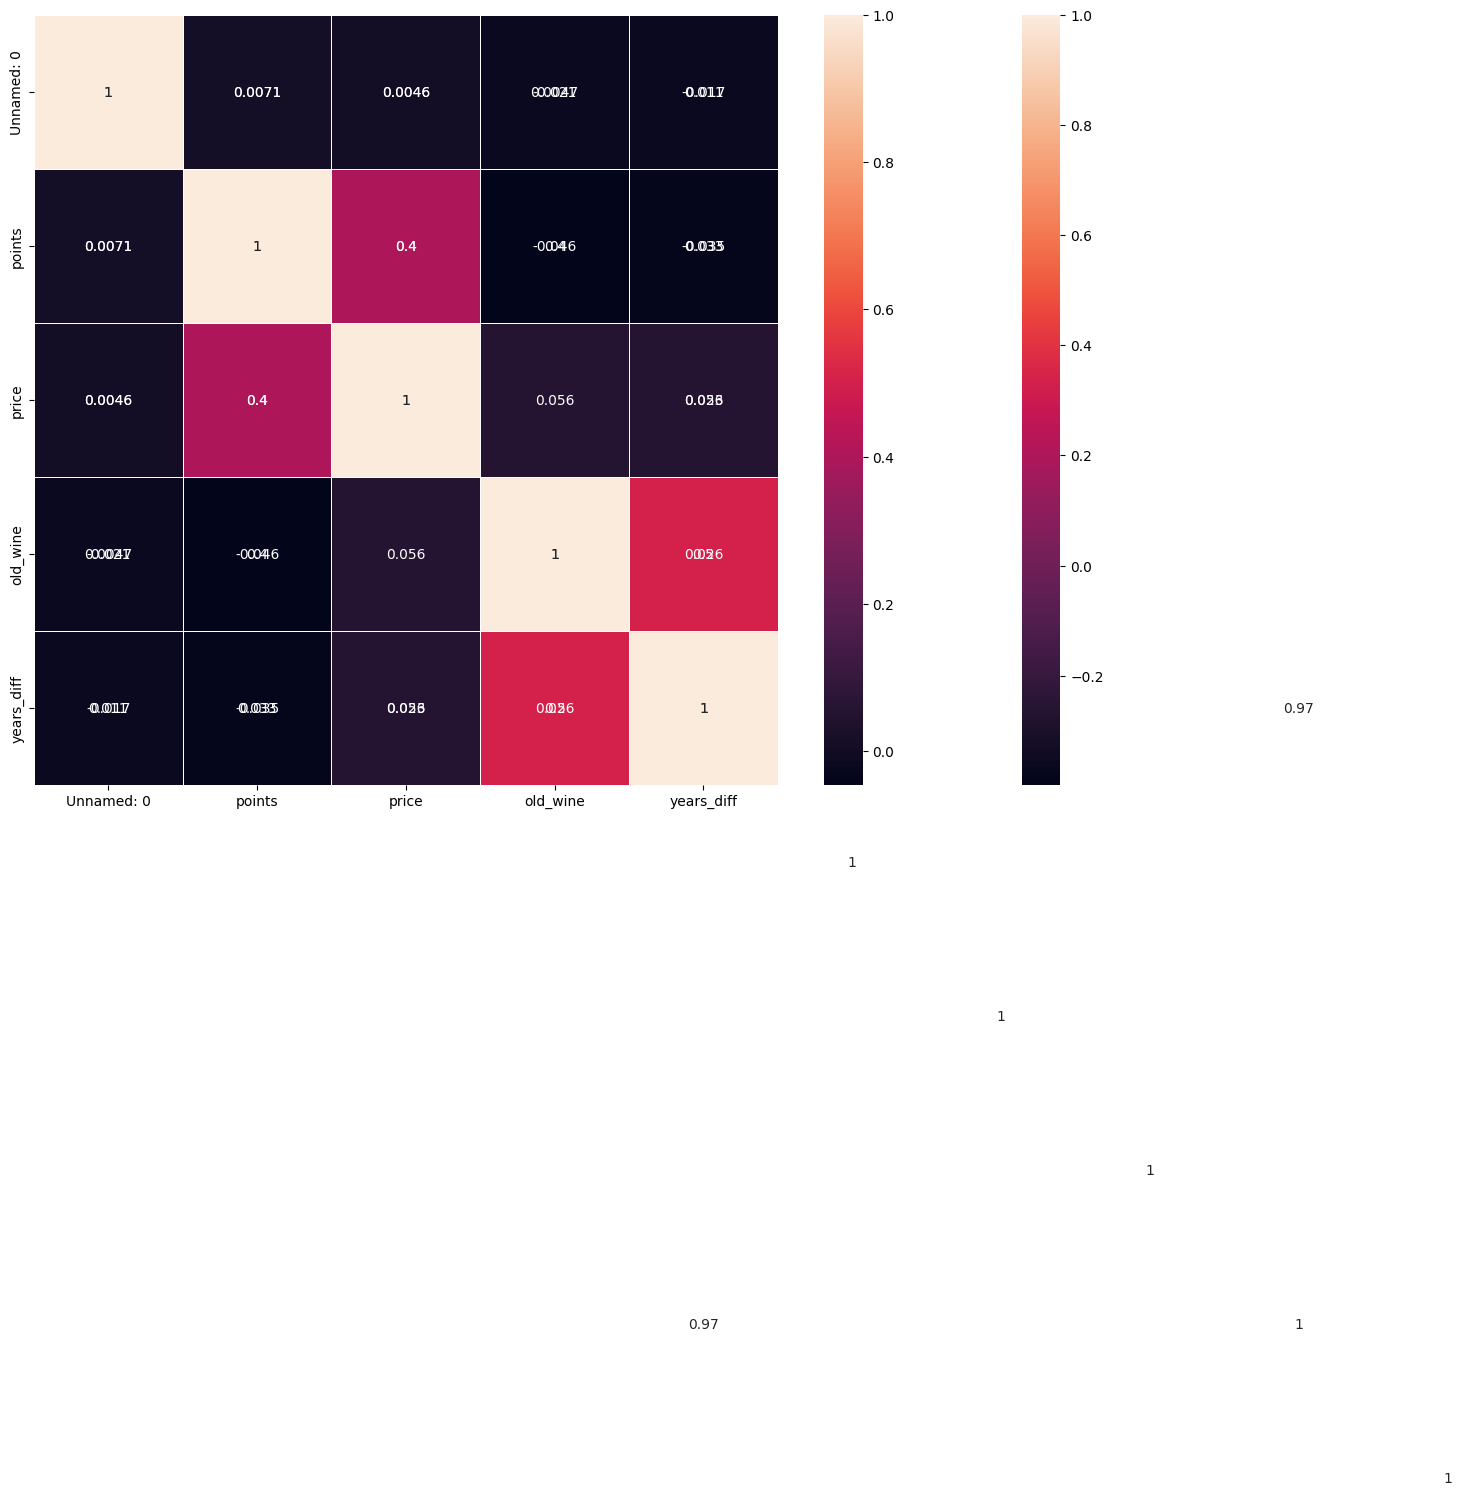

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

# Удалим самые сильно скоррелированные пары
data = data.drop(['is_usa', 'is_france', 'is_italy', 'price_round', 'area'], axis=1)

# Проверяем, что сильно скоррелированных признаков не осталось
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)